**First part(70%)**

In [5]:
import pandas as pd
df = pd.read_csv('winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

# 1) Do preparatory exercises (rename columns, change casing, normalize data types)

In [ ]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Dataset analysis
df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [ ]:
#Change casing of the colums
df = df.rename(columns=str.upper)
df = df.rename(columns={"PH": "pH"})
df.head()

FIXED ACIDITY  VOLATILE ACIDITY  CITRIC ACID  ...  SULPHATES  ALCOHOL  QUALITY
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

# 2) Handle missing values

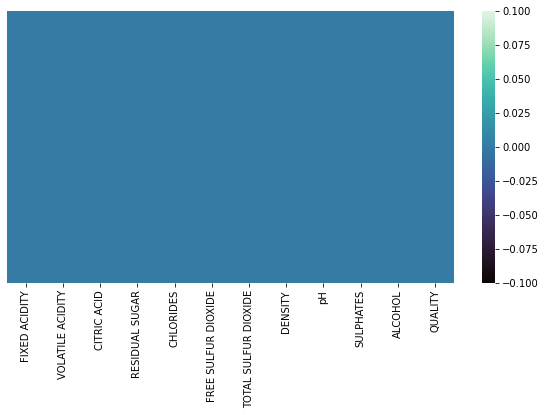

In [ ]:
#Checking for null values in dataset with visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='mako')

In [ ]:
df.isnull().sum()

FIXED ACIDITY           0
VOLATILE ACIDITY        0
CITRIC ACID             0
RESIDUAL SUGAR          0
CHLORIDES               0
FREE SULFUR DIOXIDE     0
TOTAL SULFUR DIOXIDE    0
DENSITY                 0
pH                      0
SULPHATES               0
ALCOHOL                 0
QUALITY                 0
dtype: int64

3)Parsing Dates

4)Scaling and Normalization


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

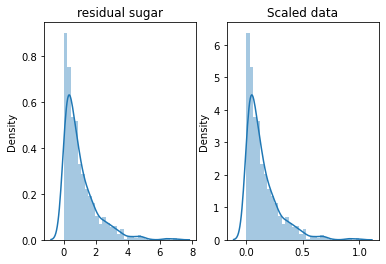

In [ ]:
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("residual sugar")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

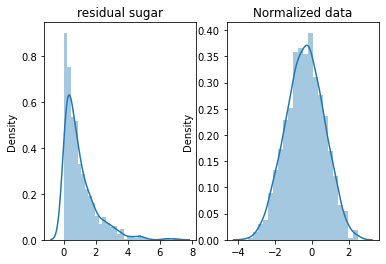

In [ ]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("residual sugar")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

5)Search for correlation between different columns and visualize the matrix of correlation.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
df = pd.read_csv('winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

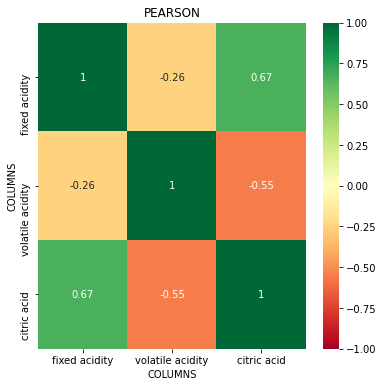

In [ ]:
set2=list(['fixed acidity', 'volatile acidity','citric acid'])
corr2 = df[set2].corr(method = "pearson")
fig = plt.figure(figsize=(6,6))
sns.heatmap(corr2,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()


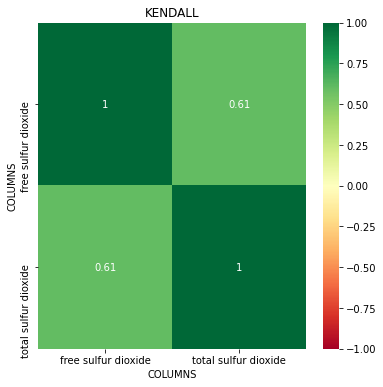

In [ ]:
set1=list(['free sulfur dioxide','total sulfur dioxide'])
corr1 = df[set1].corr(method = "kendall")
fig = plt.figure(figsize=(6,6))
sns.heatmap(corr1,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("KENDALL")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

In [ ]:
corrAll = df.corr("pearson") 
corrAll

fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric acid                0.671703         -0.552496  ...  0.109903  0.226373
residual sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...  1.000000  0.476166
quality                    0.124052         -0.390558  ...  0.476166  1.000000

[12 rows x 12 columns]

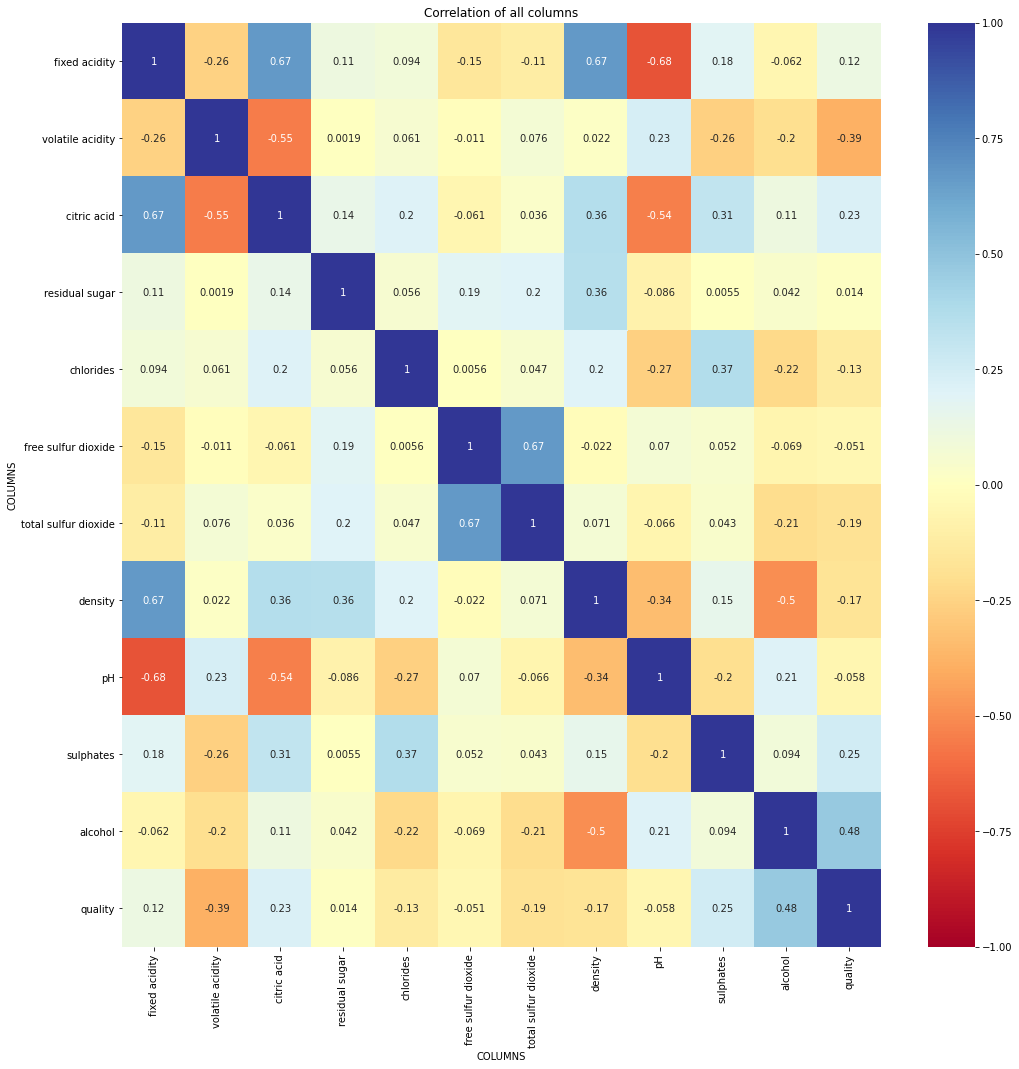

In [ ]:
fig = plt.figure(figsize=(17,17))
sns.heatmap(corrAll,annot=True,cmap='RdYlBu', vmin=-1, vmax=+1)
plt.title("Correlation of all columns")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

6)Data visualization using Python tools (Mathpotlib, etc) your data.

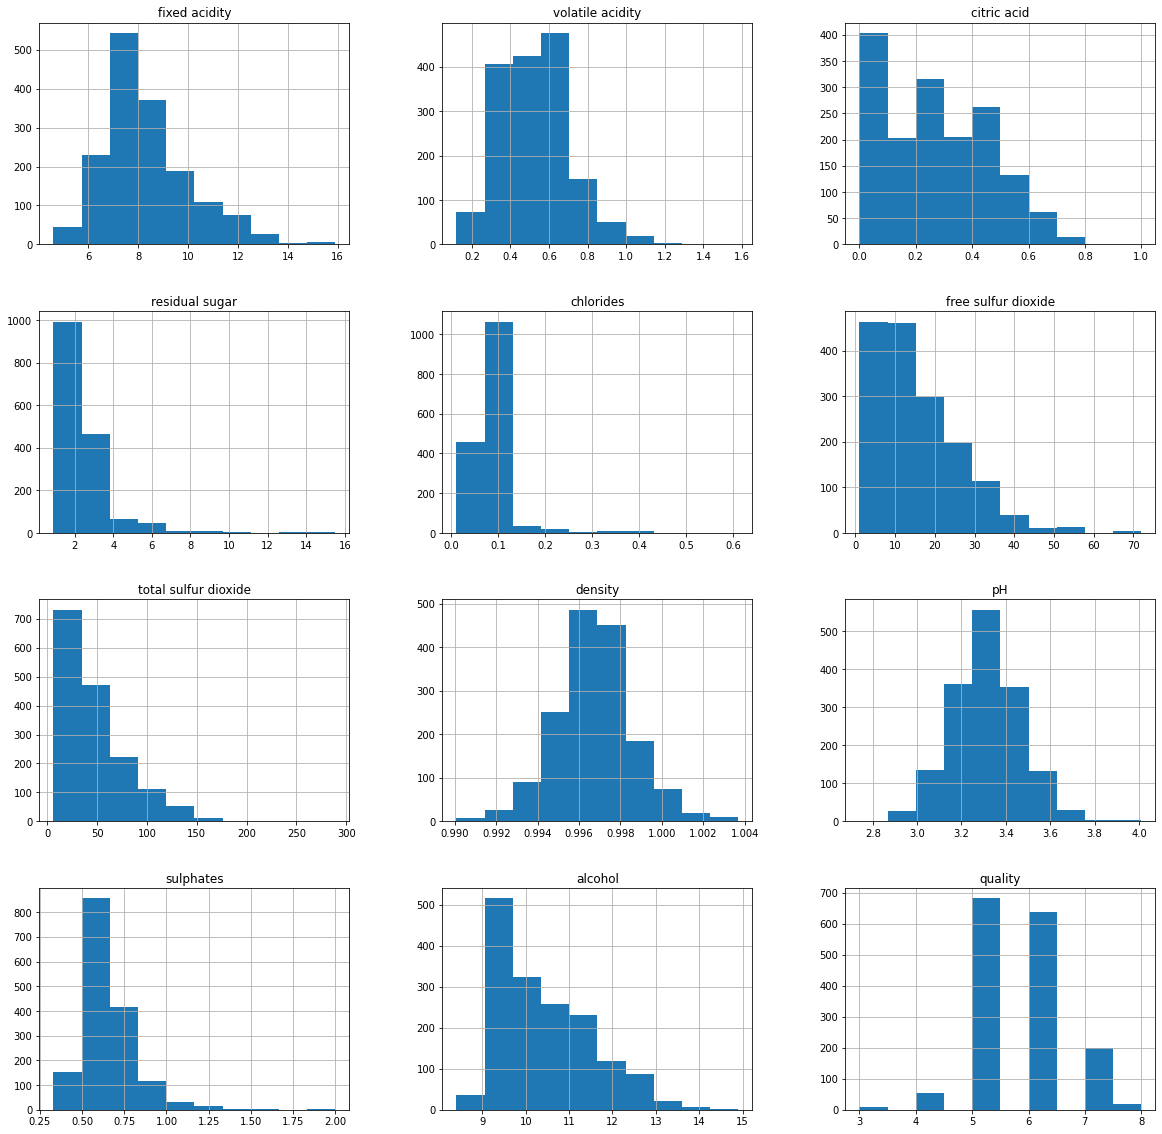

In [ ]:
df.hist(figsize = (20,20))
plt.show()

Text(0, 0.5, 'quality')

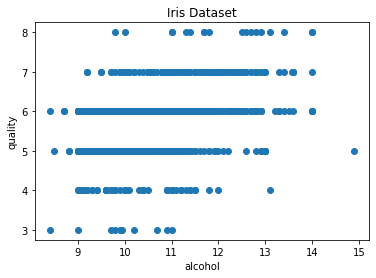

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['alcohol'],df['quality'])
ax.set_title('Iris Dataset')
ax.set_xlabel('alcohol')
ax.set_ylabel('quality')

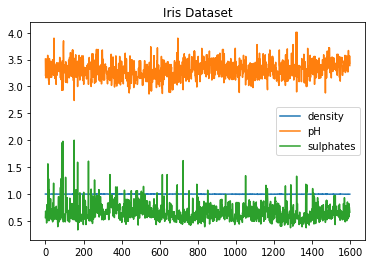

In [ ]:
columns = df.columns.drop(['fixed acidity',	'volatile acidity',	'citric acid'	,'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide', 'alcohol'	,'quality'])
x_data = range(0, df.shape[0])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, df[column], label=column)
ax.set_title('Iris Dataset')
ax.legend()

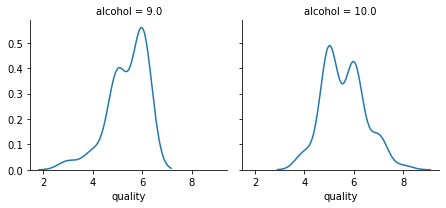

In [ ]:
df = df[df['alcohol'].isin(['9', '10'])]
g = sns.FacetGrid(df, col='alcohol',col_wrap=7)
g = g.map(sns.kdeplot, 'quality')

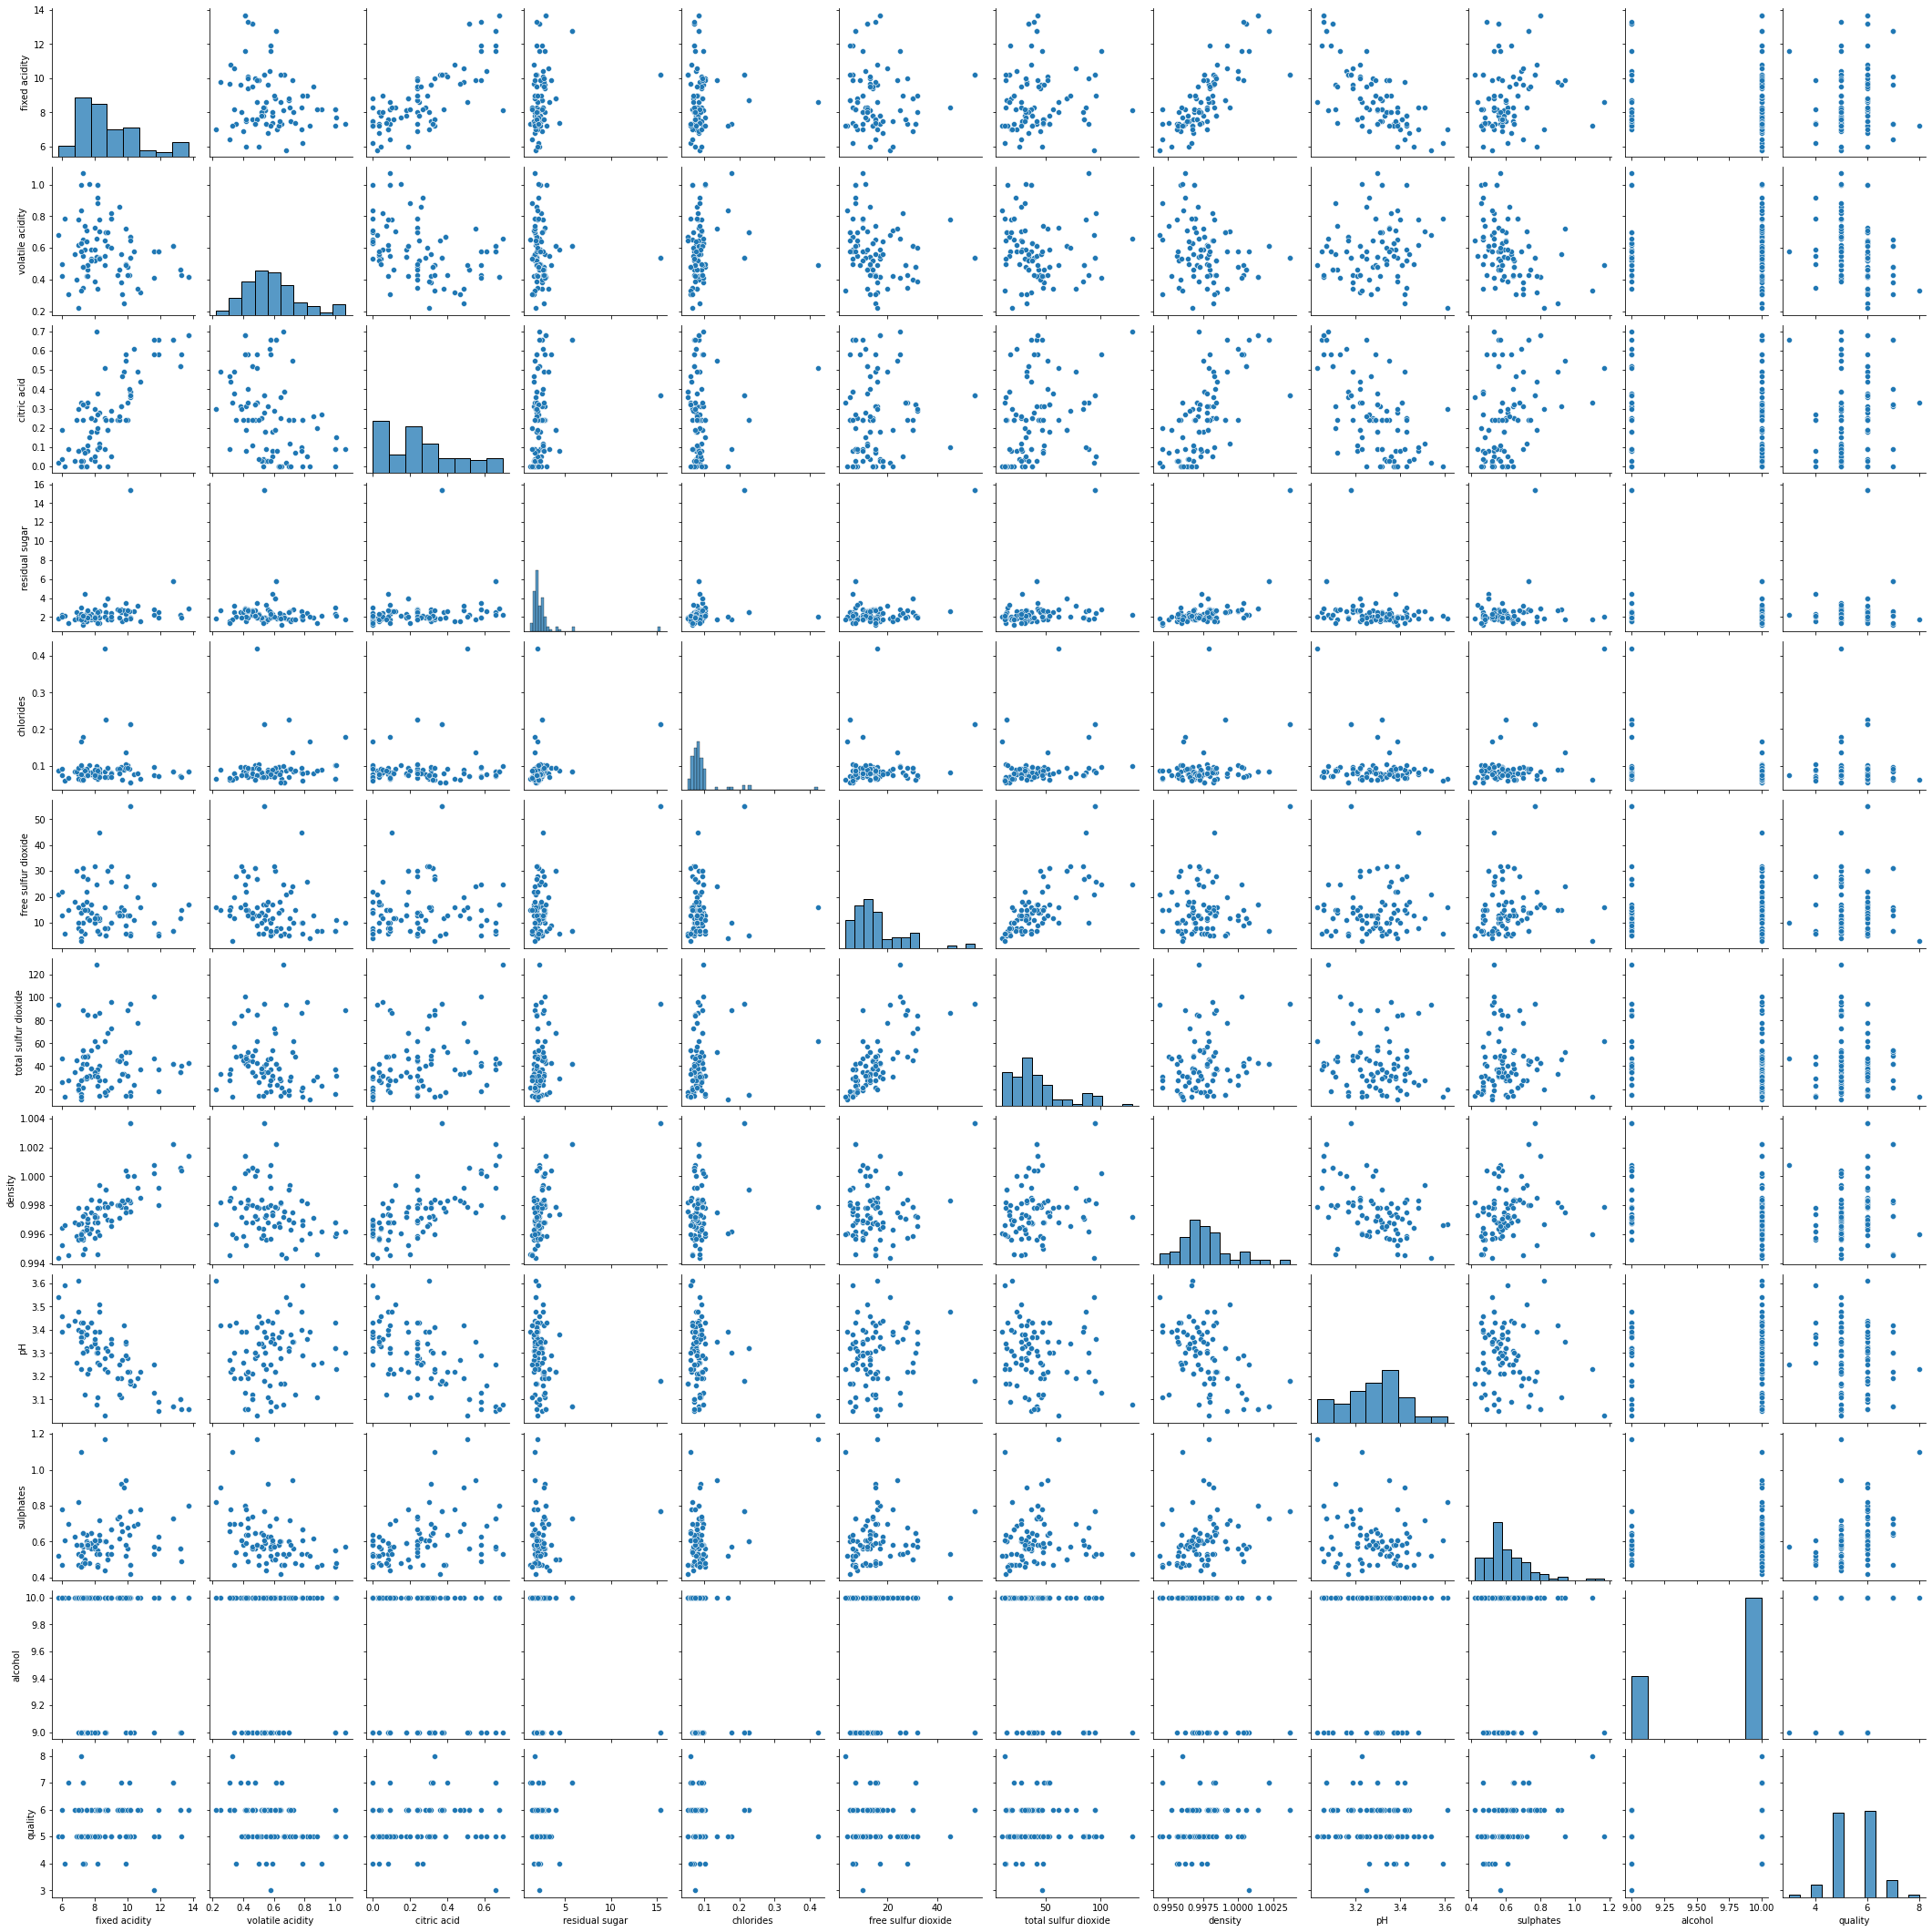

In [ ]:
sns.pairplot(df)

In [ ]:
df = px.data.tips()
fig = px.density_heatmap(df, x="total_bill", y="tip")
fig.show()

NameError: ignored

In [ ]:
import plotly.express as px
fig = px.bar(df, x="chlorides", y="alcohol", color="pH",
  animation_frame="quality", height = 700)
fig.show()

**Second part(30%)**

Machine learning. Decision tree.


# Machine learning. K-Nearest Neighbors

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn import preprocessing

In [ ]:
df.head()

FIXED ACIDITY  VOLATILE ACIDITY  CITRIC ACID  ...  SULPHATES  ALCOHOL  QUALITY
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

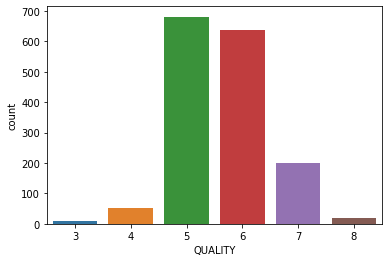

In [ ]:
sns.countplot(x = df.QUALITY)

In [ ]:
bins = (2, 6.5, 8)
labels = [0, 1]
df['QUALITY'] = pd.cut(x = df['QUALITY'], bins = bins, labels = labels)

In [ ]:
df['QUALITY'].value_counts()

0    1382
1     217
Name: QUALITY, dtype: int64

In [ ]:
# Split data 
x = df.drop(['QUALITY'],axis =1)
y = df.QUALITY

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test) 

In [ ]:
# Fit the model
knn = KNeighborsClassifier(n_neighbors = 3, p=2, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

[[272  18]
 [ 11  19]]


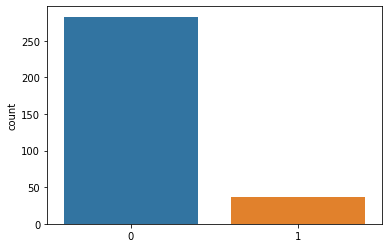

In [ ]:
# Evaluate model
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.countplot(x = y_pred)
print(cm)

In [ ]:
# Accuracy percentage
print(accuracy_score(y_test, y_pred))

0.909375


Machine learning. Decision Tree.

In [ ]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
features = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol',]
x = df[features]
y = df['quality']

print(x)
print(y)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
features = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol',]
x = df[features]
y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6166666666666667


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1','2','3','4','5','6','7','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('quality.png')
Image(graph.create_png())

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5291666666666667


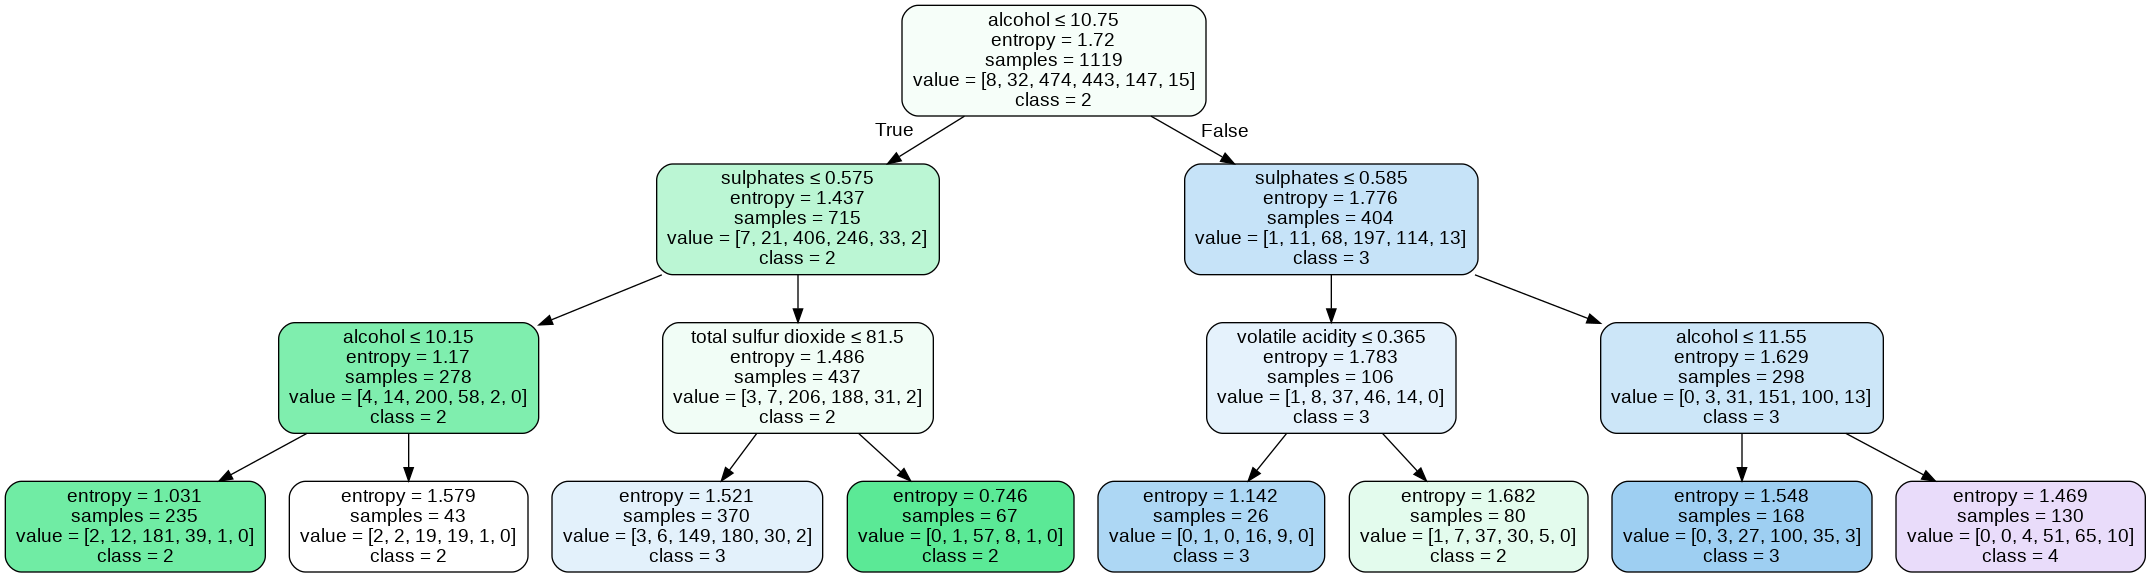

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1','2','3','4','5','6','7','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('quality_1.png')
Image(graph.create_png())

##Machine learning. Random forest 

In [20]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [21]:
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [25]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [27]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))

Accuracy: 0.9225
